In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [26]:
from catboost import CatBoostRegressor

# Cargar el modelo desde archivo
model_BR = CatBoostRegressor()
model_BR.load_model("modelo_NUAR_B_NO_KERAS_BR.cbm")

model_STB = CatBoostRegressor()
model_STB.load_model("modelo_NUAR_B_NO_KERAS_STB.cbm")


In [27]:
df=pd.read_excel('NUAR-B_04_04_2025-23_22_36_convertio.xlsx',parse_dates=["DATE/TIME(America/Asuncion)"])

# Extraemos los componentes

df['dia'] = df['DATE/TIME(America/Asuncion)'].dt.day
df['mes'] = df['DATE/TIME(America/Asuncion)'].dt.month
df['año'] = df['DATE/TIME(America/Asuncion)'].dt.year
df['hora'] = df['DATE/TIME(America/Asuncion)'].dt.hour
df['minuto'] = df['DATE/TIME(America/Asuncion)'].dt.minute
df['segundo'] = df['DATE/TIME(America/Asuncion)'].dt.second

df=df.drop('DATE/TIME(America/Asuncion)',axis=1)

/tmp/ipykernel_24223/127357692.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_excel('NUAR-B_04_04_2025-23_22_36_convertio.xlsx',parse_dates=["DATE/TIME(America/Asuncion)"])


In [28]:
# Separar entradas (X) y salidas (y)
X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
y = df[["Flow Rate Prop. BR", "Flow Rate Prop. STB"]]

# Imputar valores nulos con la mediana
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y_imputed = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)

# Dividir en entrenamiento y prueba (mismo índice para ambos targets)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.1, random_state=24)

y_train_BR = y_train["Flow Rate Prop. BR"]
y_test_BR = y_test["Flow Rate Prop. BR"]
y_train_STB = y_train["Flow Rate Prop. STB"]
y_test_STB = y_test["Flow Rate Prop. STB"]

In [29]:
y_pred_BR = model_BR.predict(X_test)
y_pred_STB = model_STB.predict(X_test)

In [30]:
# Métricas para BR
print("Flow Rate Prop. BR:")
print(f"MAE: {mean_absolute_error(y_test_BR, y_pred_BR):.2f}")
print(f"MSE: {mean_squared_error(y_test_BR, y_pred_BR):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_BR, y_pred_BR)):.2f}")
print(f"R²: {r2_score(y_test_BR, y_pred_BR):.4f}\n")

# Métricas para STB
print("Flow Rate Prop. STB:")
print(f"MAE: {mean_absolute_error(y_test_STB, y_pred_STB):.2f}")
print(f"MSE: {mean_squared_error(y_test_STB, y_pred_STB):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_STB, y_pred_STB)):.2f}")
print(f"R²: {r2_score(y_test_STB, y_pred_STB):.4f}")


Flow Rate Prop. BR:
MAE: 69.58
MSE: 5706.50
RMSE: 75.54
R²: -0.1086

Flow Rate Prop. STB:
MAE: 76.32
MSE: 6217.61
RMSE: 78.85
R²: -0.3911



📊 Resultados para Flow Rate Prop. BR:
MAE:  76.83
MSE:  8934.18
RMSE: 94.52
R²:   -0.9974

📊 Resultados para Flow Rate Prop. STB:
MAE:  66.68
MSE:  6617.46
RMSE: 81.35
R²:   -0.6859


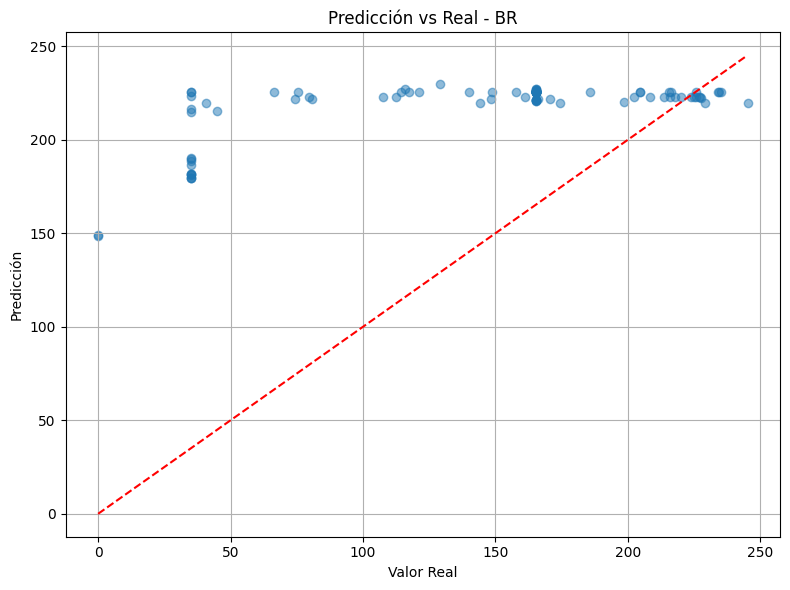

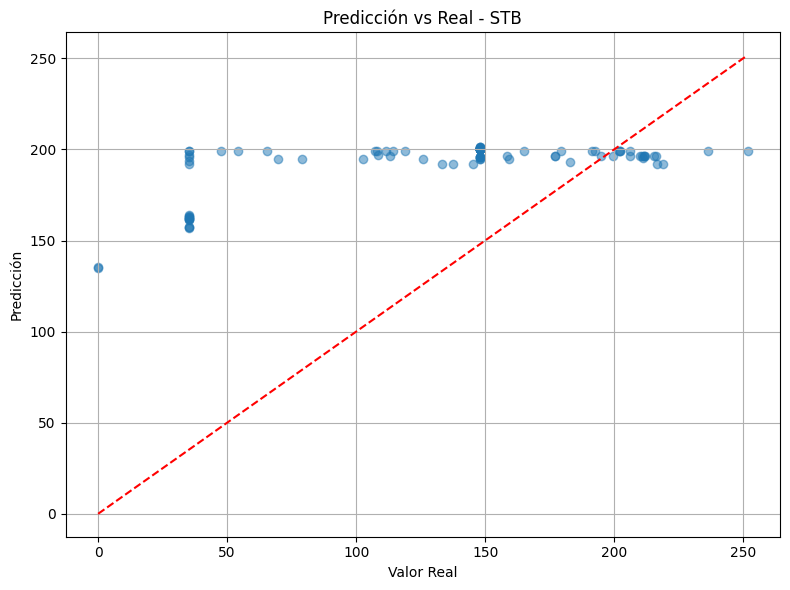

In [17]:
y_train

,Flow Rate Prop. BR,Flow Rate Prop. STB
840,143.9,159.4
99,165.3,147.9
871,220.4,209.0
258,35.2,35.2
805,165.3,147.9
...,...,...
401,35.2,35.2
343,165.3,147.9
192,233.2,223.7
899,165.3,147.9


In [18]:
y_test

,Flow Rate Prop. BR,Flow Rate Prop. STB
730,204.6,206.0
512,165.3,147.9
203,174.4,145.4
244,165.3,147.9
25,165.3,147.9
...,...,...
5,165.3,147.9
235,0.0,0.0
367,165.3,147.9
115,80.9,78.9
